# 예술과의 융합교육

### [Step1] 데이터 로드

In [1]:
import pandas as pd

df_train = pd.read_csv('datasets/fashion-mnist_train.csv') # 훈련 데이터 파일 열기
df_test = pd.read_csv('datasets/fashion-mnist_test.csv') # 테스트 데이터 파일 열기

### [Step2] 데이터 파악하기

In [2]:
print(df_train.info( ), '\n')
print(df_test.info( ), '\n')
print(df_train.shape, '\n')
print(df_test.shape, '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB
None 

(60000, 785) 

(10000, 785) 



### [Step3] 데이터 형태 변형하기

In [3]:
import numpy as np
# 데이터 프레임을 배열 형태로 저장하기

data_train = np.array(df_train, dtype = np.float32) # 훈련 데이터를 배열로 저장
x_train = data_train[:, 1:] # 훈련 데이터의 각 행별 픽셀 값 저장
y_train = data_train[:, 0] # 훈련 데이터의 각 행별 레이블 저장

data_test = np.array(df_test) # 테스트 데이터를 배열로 저장
x_test = data_test[:, 1:] # 테스트 데이터의 각 행별 픽셀 값 저장
y_test = data_test[:, 0] # 테스트 데이터의 각 행별 레이블 저장

### [Step4] 데이터를 이미지 형태로 확인하기

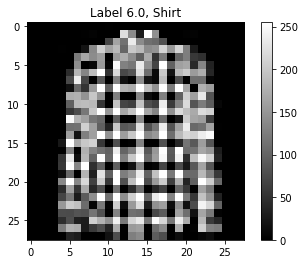

In [4]:
import matplotlib.pyplot as plt
import random

# 의류 종류 레이블을 딕셔너리로 저장하기
label_dictionary = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', \
                    3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', \
                    7:'Sneaker', 8:'Bag', 9:'Ankle boot' }

# 훈련 데이터 중 1개 행 데이터 시각화
sample = 123
plt.imshow(x_train[sample].reshape(28,28), cmap = 'gray')
plt.colorbar()
plt.title('Label {}, {}'.format(y_train[sample], label_dictionary[y_train[sample]]))
plt.show( )

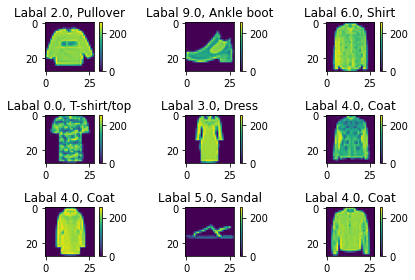

In [5]:
for i in range(9) :
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i].reshape(28, 28)) #imshow를 활용하여 이미지표시
    plt.colorbar( ) #컬러바 설정하기
    plt.title('Labal {}, {}'.format(y_train[i], label_dictionary[y_train[i]])) #각 그림의 제목 출력하기

plt.tight_layout( )
plt.show( )

### [Step5] 모델 구성 및 학습하기

In [20]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=30,hidden_layer_sizes=(100,),verbose = True).fit(x_train, y_train)

Iteration 1, loss = 3.09207350
Iteration 2, loss = 1.07367269
Iteration 3, loss = 0.74096733
Iteration 4, loss = 0.65106003
Iteration 5, loss = 0.58933388
Iteration 6, loss = 0.54999105
Iteration 7, loss = 0.50975284
Iteration 8, loss = 0.48546009
Iteration 9, loss = 0.45651943
Iteration 10, loss = 0.44033534
Iteration 11, loss = 0.42739296
Iteration 12, loss = 0.41735326
Iteration 13, loss = 0.41474709
Iteration 14, loss = 0.40330086
Iteration 15, loss = 0.39370439
Iteration 16, loss = 0.38812890
Iteration 17, loss = 0.39006261
Iteration 18, loss = 0.38569079
Iteration 19, loss = 0.37661295
Iteration 20, loss = 0.37006175
Iteration 21, loss = 0.37161659
Iteration 22, loss = 0.36177343
Iteration 23, loss = 0.35736611
Iteration 24, loss = 0.35363637
Iteration 25, loss = 0.35653935
Iteration 26, loss = 0.35940610
Iteration 27, loss = 0.35659647
Iteration 28, loss = 0.35646327
Iteration 29, loss = 0.35063725
Iteration 30, loss = 0.34231132


0.8589

### [Step6] 학습결과 확인하기

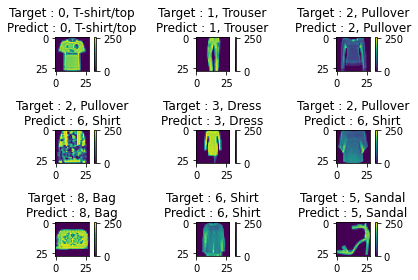

Accuracy : 85.89%


In [30]:
pred = clf.predict(x_test[:9, :])

for i in range(9) :
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.colorbar( )
    plt.title('Target : {}, {}\nPredict : {}, {}'.format(y_test[i], label_dictionary[y_test[i]], int(pred[i]), label_dictionary[pred[i]]))

plt.tight_layout( )
plt.show( )

print(f'Accuracy : {clf.score(x_test, y_test)*100:.2f}%')